# Ensemble Learning-[Predicting Breast Cancer in a patient]
## Problem Statement
### Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques. Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.

### 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline

### 2. Importing Data

In [2]:
df=pd.read_csv('cancer.csv',)

In [3]:
 df.index = np.arange(1, len(df)+1)

In [4]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.transpose()

1         2         3         4         5    \
id                         842302    842517  84300903  84348301  84358402   
diagnosis                       M         M         M         M         M   
radius_mean                 17.99     20.57     19.69     11.42     20.29   
texture_mean                10.38     17.77     21.25     20.38     14.34   
perimeter_mean              122.8     132.9     130.0     77.58     135.1   
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0   
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003   
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328   
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198   
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043   
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809   
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883   
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572   
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813   
perimeter_se                8.589     3.398     4.585     3.445     5.438   
area_se                     153.4     74.08     94.03     27.23     94.44   
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149   
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461   
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688   
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885   
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756   
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115   
radius_worst                25.38     24.99     23.57     14.91     22.54   
texture_worst               17.33     23.41     25.53      26.5     16.67   
perimeter_worst             184.6     158.8     152.5     98.87     152.2   
area_worst                 2019.0    1956.0    1709.0     567.7    1575.0   
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374   
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205   
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4   
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625   
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364   
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678   
Unnamed: 32                   NaN       NaN       NaN       NaN       NaN   

                              6         7         8         9         10   \
id                         843786    844359  84458202    844981  84501001   
diagnosis                       M         M         M         M         M   
radius_mean                 12.45     18.25     13.71      13.0     12.46   
texture_mean                 15.7     19.98     20.83     21.82     24.04   
perimeter_mean              82.57     119.6      90.2      87.5     83.97   
area_mean                   477.1    1040.0     577.9     519.8     475.9   
smoothness_mean            0.1278   0.09463    0.1189    0.1273    0.1186   
compactness_mean             0.17     0.109    0.1645    0.1932    0.2396   
concavity_mean             0.1578    0.1127   0.09366    0.1859    0.2273   
concave points_mean       0.08089     0.074   0.05985   0.09353   0.08543   
symmetry_mean              0.2087    0.1794    0.2196     0.235     0.203   
fractal_dimension_mean    0.07613   0.05742   0.07451   0.07389   0.08243   
radius_se                  0.3345    0.4467    0.5835    0.3063    0.2976   
texture_se                 0.8902    0.7732     1.377     1.002     1.599   
perimeter_se                2.217      3.18     3.856     2.406     2.039   
area_se                     27.19     53.91     50.96     24.32     23.94   
smoothness_se             0.00751  0.004314  0.008805  0.005731  0.007149   
compactness_se           

In [6]:
df.drop(['Unnamed: 32'], axis=1,inplace=True)

In [7]:
df.transpose()

1         2         3         4         5    \
id                         842302    842517  84300903  84348301  84358402   
diagnosis                       M         M         M         M         M   
radius_mean                 17.99     20.57     19.69     11.42     20.29   
texture_mean                10.38     17.77     21.25     20.38     14.34   
perimeter_mean              122.8     132.9     130.0     77.58     135.1   
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0   
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003   
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328   
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198   
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043   
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809   
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883   
radius_se                   1.095    0.5435    0.7456    0.4956    0.7572   
texture_se                 0.9053    0.7339    0.7869     1.156    0.7813   
perimeter_se                8.589     3.398     4.585     3.445     5.438   
area_se                     153.4     74.08     94.03     27.23     94.44   
smoothness_se            0.006399  0.005225   0.00615   0.00911   0.01149   
compactness_se            0.04904   0.01308   0.04006   0.07458   0.02461   
concavity_se              0.05373    0.0186   0.03832   0.05661   0.05688   
concave points_se         0.01587    0.0134   0.02058   0.01867   0.01885   
symmetry_se               0.03003   0.01389    0.0225   0.05963   0.01756   
fractal_dimension_se     0.006193  0.003532  0.004571  0.009208  0.005115   
radius_worst                25.38     24.99     23.57     14.91     22.54   
texture_worst               17.33     23.41     25.53      26.5     16.67   
perimeter_worst             184.6     158.8     152.5     98.87     152.2   
area_worst                 2019.0    1956.0    1709.0     567.7    1575.0   
smoothness_worst           0.1622    0.1238    0.1444    0.2098    0.1374   
compactness_worst          0.6656    0.1866    0.4245    0.8663     0.205   
concavity_worst            0.7119    0.2416    0.4504    0.6869       0.4   
concave points_worst       0.2654     0.186     0.243    0.2575    0.1625   
symmetry_worst             0.4601     0.275    0.3613    0.6638    0.2364   
fractal_dimension_worst    0.1189   0.08902   0.08758     0.173   0.07678   

                              6         7         8         9         10   \
id                         843786    844359  84458202    844981  84501001   
diagnosis                       M         M         M         M         M   
radius_mean                 12.45     18.25     13.71      13.0     12.46   
texture_mean                 15.7     19.98     20.83     21.82     24.04   
perimeter_mean              82.57     119.6      90.2      87.5     83.97   
area_mean                   477.1    1040.0     577.9     519.8     475.9   
smoothness_mean            0.1278   0.09463    0.1189    0.1273    0.1186   
compactness_mean             0.17     0.109    0.1645    0.1932    0.2396   
concavity_mean             0.1578    0.1127   0.09366    0.1859    0.2273   
concave points_mean       0.08089     0.074   0.05985   0.09353   0.08543   
symmetry_mean              0.2087    0.1794    0.2196     0.235     0.203   
fractal_dimension_mean    0.07613   0.05742   0.07451   0.07389   0.08243   
radius_se                  0.3345    0.4467    0.5835    0.3063    0.2976   
texture_se                 0.8902    0.7732     1.377     1.002     1.599   
perimeter_se                2.217      3.18     3.856     2.406     2.039   
area_se                     27.19     53.91     50.96     24.32     23.94   
smoothness_se             0.00751  0.004314  0.008805  0.005731  0.007149   
compactness_se            0.03345   0.01382   0.03029   0.03502   0.07217   
concavity_se             

### 3. EDA

In [8]:
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
117    864726         B         8.95         15.76           58.74      245.2   
276   8911164         B        11.89         17.36           76.20      435.6   
394    903516         M        21.61         22.28          144.40     1407.0   
43     855625         M        19.07         24.81          128.30     1104.0   
455    911202         B        12.62         17.15           80.62      492.9   
90     861598         B        14.64         15.24           95.77      651.9   
12   84610002         M        15.78         17.89          103.60      781.0   
569     92751         B         7.76         24.54           47.92      181.0   
282   8912055         B        11.74         14.02           74.24      427.3   
335    897374         B        12.30         19.02           77.88      464.4   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
117          0.09462           0.12430        0.092630             0.023080   
276          0.12250           0.07210        0.059290             0.074040   
394          0.11670           0.20870        0.281000             0.156200   
43           0.09081           0.21900        0.210700             0.099610   
455          0.08583           0.05430        0.029660             0.022720   
90           0.11320           0.13390        0.099660             0.070640   
12           0.09710           0.12920        0.099540             0.066060   
569          0.05263           0.04362        0.000000             0.000000   
282          0.07813           0.04340        0.022450             0.027630   
335          0.08313           0.04202        0.007756             0.008535   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
117  ...         9.414          17.07            63.34       270.0   
276  ...        12.400          18.99            79.46       472.4   
394  ...        26.230          28.74           172.00      2081.0   
43   ...        24.090          33.17           177.40      1651.0   
455  ...        14.340          22.15            91.62       633.5   
90   ...        16.340          18.24           109.40       803.6   
12   ...        20.420          27.28           136.50      1299.0   
569  ...         9.456          30.37            59.16       268.6   
282  ...        13.310          18.26            84.70       533.7   
335  ...        13.350          28.46            84.53       544.3   

     smoothness_worst  compactness_worst  concavity_worst  \
117           0.11790            0.18790          0.15440   
276           0.13590            0.08368          0.07153   
394           0.15020            0.57170          0.70530   
43            0.12470            0.74440          0.72420   
455           0.12250            0.15170          0.18870   
90            0.12770            0.30890          0.26040   
12            0.13960            0.56090          0.39650   
569           0.08996            0.06444          0.00000   
282           0.10360            0.08500          0.06735   
335           0.12220            0.09052          0.03619   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
117               0.03846          0.1652                  0.07722  
276               0.08946          0.2220                  0.06033  
394               0.24220          0.3828                  0.10070  
43                0.24930          0.4670                  0.10380  
455               0.09851          0.3270                  0.07330  
90                0.13970          0.3151                  0.08473  
12                0.18100          0.3792                  0.10480  
569               0.00000          0.2871                  0.07039  
282               0.08290          0.3101                  0.06688  
335               0.03983          0.2554                  0.07207  

[10 rows x 32 columns]

In [9]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [10]:
df.describe(include='all')

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
count   5.690000e+02       569   569.000000    569.000000      569.000000   
unique           NaN         2          NaN           NaN             NaN   
top              NaN         B          NaN           NaN             NaN   
freq             NaN       357          NaN           NaN             NaN   
mean    3.037183e+07       NaN    14.127292     19.289649       91.969033   
std     1.250206e+08       NaN     3.524049      4.301036       24.298981   
min     8.670000e+03       NaN     6.981000      9.710000       43.790000   
25%     8.692180e+05       NaN    11.700000     16.170000       75.170000   
50%     9.060240e+05       NaN    13.370000     18.840000       86.240000   
75%     8.813129e+06       NaN    15.780000     21.800000      104.100000   
max     9.113205e+08       NaN    28.110000     39.280000      188.500000   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count    569.000000       569.000000        569.000000      569.000000   
unique          NaN              NaN               NaN             NaN   
top             NaN              NaN               NaN             NaN   
freq            NaN              NaN               NaN             NaN   
mean     654.889104         0.096360          0.104341        0.088799   
std      351.914129         0.014064          0.052813        0.079720   
min      143.500000         0.052630          0.019380        0.000000   
25%      420.300000         0.086370          0.064920        0.029560   
50%      551.100000         0.095870          0.092630        0.061540   
75%      782.700000         0.105300          0.130400        0.130700   
max     2501.000000         0.163400          0.345400        0.426800   

        concave points_mean  ...  radius_worst  texture_worst  \
count            569.000000  ...    569.000000     569.000000   
unique                  NaN  ...           NaN            NaN   
top                     NaN  ...           NaN            NaN   
freq                    NaN  ...           NaN            NaN   
mean               0.048919  ...     16.269190      25.677223   
std                0.038803  ...      4.833242       6.146258   
min                0.000000  ...      7.930000      12.020000   
25%                0.020310  ...     13.010000      21.080000   
50%                0.033500  ...     14.970000      25.410000   
75%                0.074000  ...     18.790000      29.720000   
max                0.201200  ...     36.040000      49.540000   

        perimeter_worst   area_worst  smoothness_worst  compactness_worst  \
count        569.000000   569.000000        569.000000         569.000000   
unique              NaN          NaN               NaN                NaN   
top                 NaN          NaN               NaN                NaN   
freq                NaN          NaN               NaN                NaN   
mean         107.261213   880.583128          0.132369           0.254265   
std           33.602542   569.356993          0.022832           0.157336   
min           50.410000   185.200000          0.071170           0.027290   
25%           84.110000   515.300000          0.116600           0.147200   
50%           97.660000   686.500000          0.131300           0.211900   
75%          125.400000  1084.000000          0.146000           0.339100   
max          251.200000  4254.000000          0.222600           1.058000   

        concavity_worst  concave points_worst  symmetry_worst  \
count        569.000000            569.000000      569.000000   
unique              NaN                   NaN             NaN   
top                 NaN                   NaN             NaN   
freq                NaN                   NaN             NaN   
mean           0.272188              0.114606        0.290076   
std            0.208624              0.065732        0.061867   
min            0.000000              0.0000

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

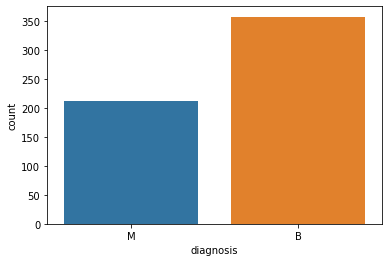

In [11]:
sns.countplot(x="diagnosis",data=df)

In [12]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 1 to 569
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<AxesSubplot:>

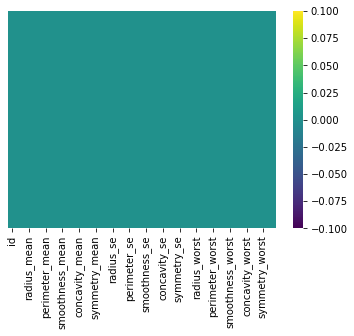

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:>

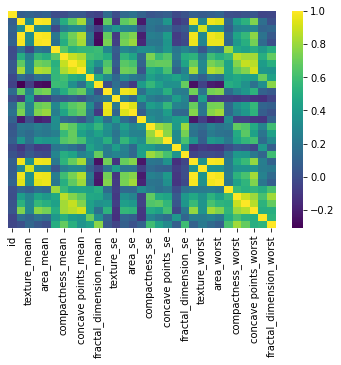

In [15]:
sns.heatmap(df.corr(),yticklabels=False,cmap="viridis")

In [16]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [17]:
df.shape

(569, 32)

In [18]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [19]:
Encoded_Data = {'diagnosis':{'M':0, 'B':1}}

In [20]:
Encoded_Data

{'diagnosis': {'M': 0, 'B': 1}}

In [21]:
df=df.replace(Encoded_Data)

In [22]:
df

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
1      842302          0        17.99         10.38          122.80   
2      842517          0        20.57         17.77          132.90   
3    84300903          0        19.69         21.25          130.00   
4    84348301          0        11.42         20.38           77.58   
5    84358402          0        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
565    926424          0        21.56         22.39          142.00   
566    926682          0        20.13         28.25          131.20   
567    926954          0        16.60         28.08          108.30   
568    927241          0        20.60         29.33          140.10   
569     92751          1         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
1       1001.0          0.11840           0.27760         0.30010   
2       1326.0          0.08474           0.07864         0.08690   
3       1203.0          0.10960           0.15990         0.19740   
4        386.1          0.14250           0.28390         0.24140   
5       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
565     1479.0          0.11100           0.11590         0.24390   
566     1261.0          0.09780           0.10340         0.14400   
567      858.1          0.08455           0.10230         0.09251   
568     1265.0          0.11780           0.27700         0.35140   
569      181.0          0.05263           0.04362         0.00000   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1                0.14710  ...        25.380          17.33           184.60   
2                0.07017  ...        24.990          23.41           158.80   
3                0.12790  ...        23.570          25.53           152.50   
4                0.10520  ...        14.910          26.50            98.87   
5                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
565              0.13890  ...        25.450          26.40           166.10   
566              0.09791  ...        23.690          38.25           155.00   
567              0.05302  ...        18.980          34.12           126.70   
568              0.15200  ...        25.740          39.42           184.60   
569              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
1        2019.0           0.16220            0.66560           0.7119   
2        1956.0           0.12380            0.18660           0.2416   
3        1709.0           0.14440            0.42450           0.4504   
4         567.7           0.20980            0.86630           0.6869   
5        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
565      2027.0           0.14100            0.21130           0.4107   
566      1731.0           0.11660            0.19220           0.3215   
567      1124.0           0.11390            0.30940           0.3403   
568      1821.0           0.16500            0.86810           0.9387   
569       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
1                  0.2654          0.4601                  0.11890  
2                  0.1860          0.2750                  0.08902  
3                  0.2430          0.3613                  0.08758  
4                  0.2575          0.6638                  0.17300  
5                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
565                0

### Encoding Done

## See distribution for all numeric variables

In [23]:
# Pulling out names of numerical variables by conditioning dtypes NOT equal to object type
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  32
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Number of Categorical features:  0


C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

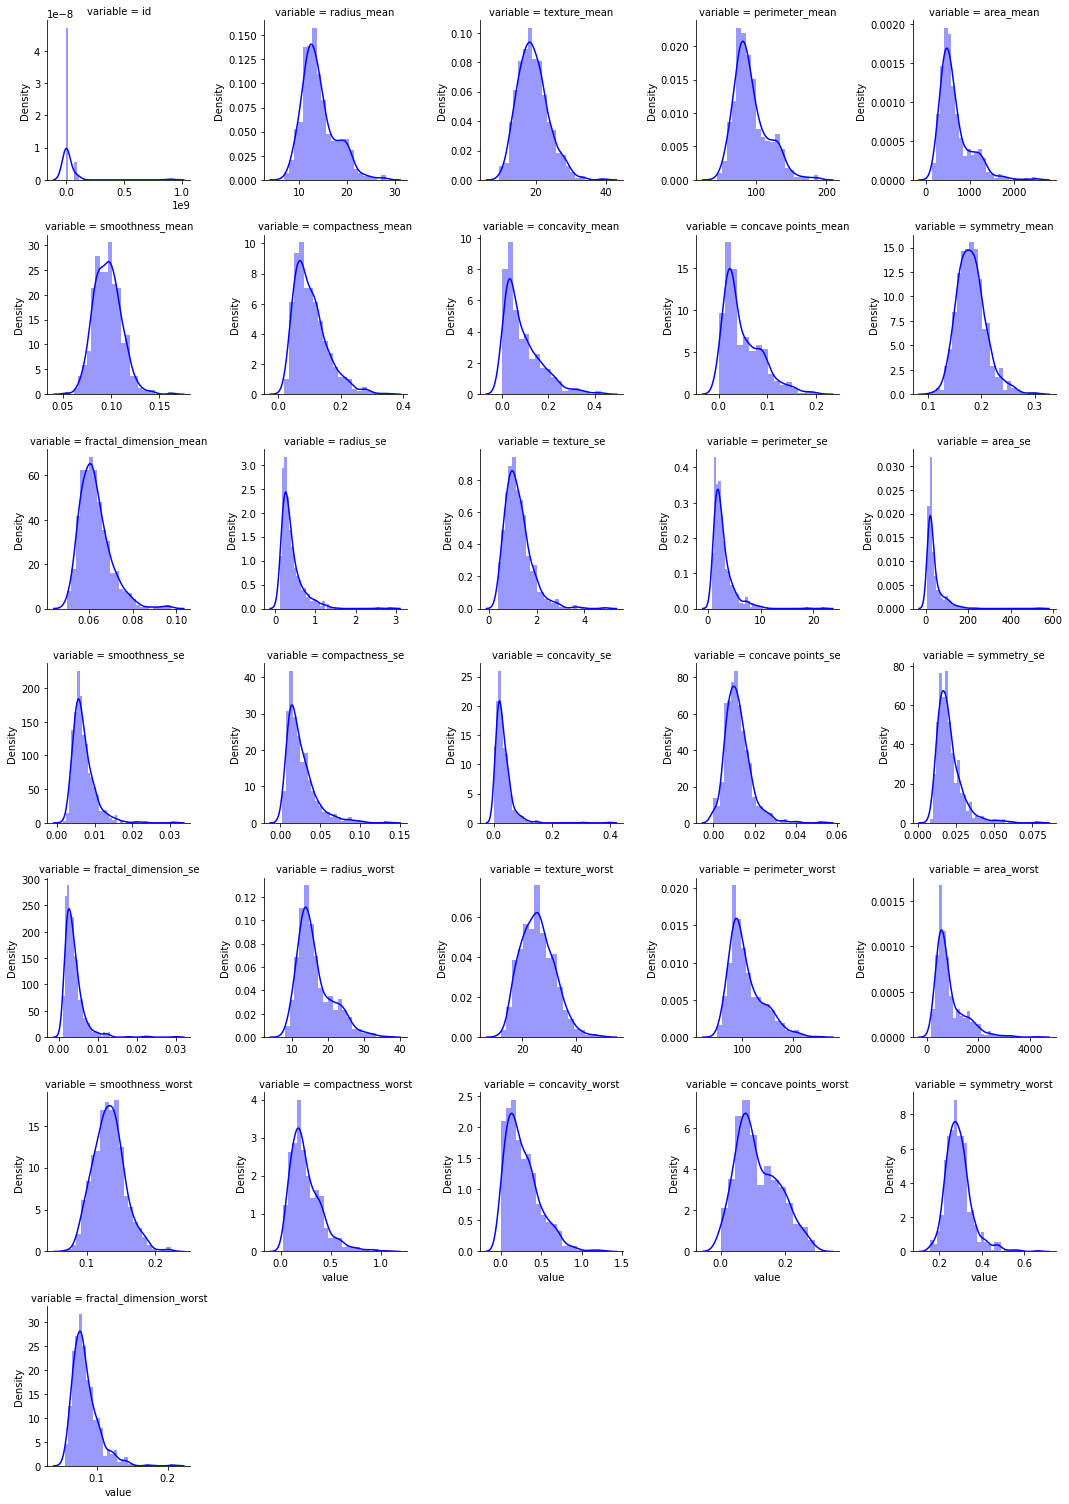

In [24]:
f = pd.melt(df, id_vars=['diagnosis'],value_vars= numerical_features[numerical_features != 'diagnosis'])
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, "value", color="blue")

In [25]:
type(numerical_features)

pandas.core.indexes.base.Index

## Check distribution of SalePrice with respect to variable values

In [26]:
# Generate a correlation matrix for all the numeric variables
corr=df[numerical_features].corr()
print(corr)

                               id  diagnosis  radius_mean  texture_mean  \
id                       1.000000  -0.039769     0.074626      0.099770   
diagnosis               -0.039769   1.000000    -0.730029     -0.415185   
radius_mean              0.074626  -0.730029     1.000000      0.323782   
texture_mean             0.099770  -0.415185     0.323782      1.000000   
perimeter_mean           0.073159  -0.742636     0.997855      0.329533   
area_mean                0.096893  -0.708984     0.987357      0.321086   
smoothness_mean         -0.012968  -0.358560     0.170581     -0.023389   
compactness_mean         0.000096  -0.596534     0.506124      0.236702   
concavity_mean           0.050080  -0.696360     0.676764      0.302418   
concave points_mean      0.044158  -0.776614     0.822529      0.293464   
symmetry_mean           -0.022114  -0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511   0.012838    -0.311631     -0.076437   
radius_se                

In [27]:
corr=df.corr()["diagnosis"]
corr[np.argsort(corr)[::-1]]

diagnosis                  1.000000
smoothness_se              0.067016
fractal_dimension_mean     0.012838
texture_se                 0.008303
symmetry_se                0.006522
id                        -0.039769
fractal_dimension_se      -0.077972
concavity_se              -0.253730
compactness_se            -0.292999
fractal_dimension_worst   -0.323872
symmetry_mean             -0.330499
smoothness_mean           -0.358560
concave points_se         -0.408042
texture_mean              -0.415185
symmetry_worst            -0.416294
smoothness_worst          -0.421465
texture_worst             -0.456903
area_se                   -0.548236
perimeter_se              -0.556141
radius_se                 -0.567134
compactness_worst         -0.590998
compactness_mean          -0.596534
concavity_worst           -0.659610
concavity_mean            -0.696360
area_mean                 -0.708984
radius_mean               -0.730029
area_worst                -0.733825
perimeter_mean            -0

<AxesSubplot:title={'center':'Correlation of Numeric Features with Sale Price'}>

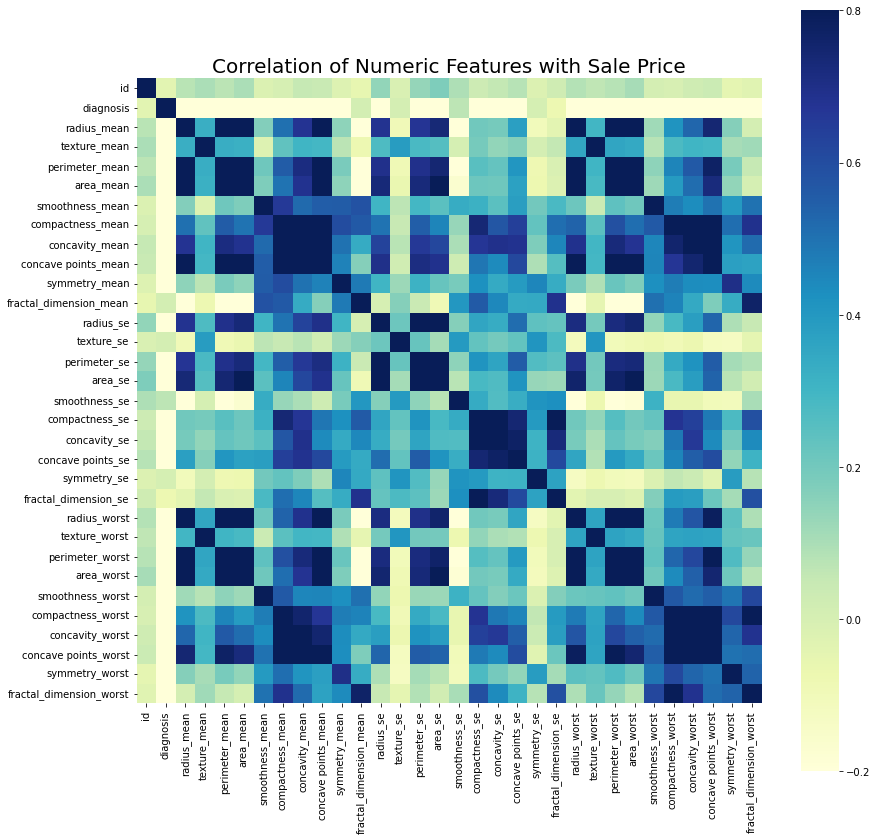

In [28]:
# Get correlation of numeric variables
df_numerical_features= df.select_dtypes(include=[np.number])

correlation= df_numerical_features.corr()
correlation["diagnosis"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,14))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=20)

# cmap - matplotlib colormap name or object - can be used to set the color options
# vmin & vmax is used to anchor the colormap
sns.heatmap(correlation, square= True, vmin=-0.2, vmax=0.8, cmap="YlGnBu")

<AxesSubplot:title={'center':'Correlation of Numeric Features with Diagnosis'}>

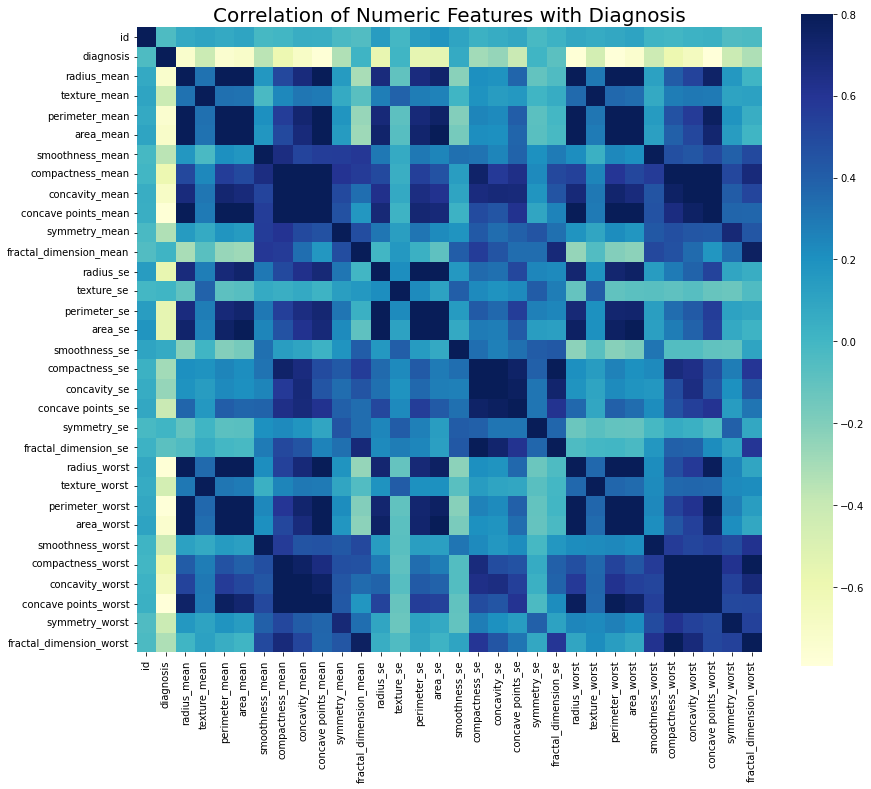

In [29]:
# Get correlation of numeric variables
numeric_features= df.select_dtypes(include= [np.number])

correlation= numeric_features.corr()
correlation["diagnosis"].sort_values(ascending=False)*100
# Correlation Heat Map (Seaborn library)
f, ax= plt.subplots(figsize=(14,12))
plt.title("Correlation of Numeric Features with Diagnosis", y=1, size=20)
sns.heatmap(correlation, square= True, vmax=0.8, cmap="YlGnBu")

Index(['diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se',
       'symmetry_se', 'id', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave points_se', 'texture_mean',
       'symmetry_worst', 'smoothness_worst', 'texture_worst', 'area_se',
       'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean',
       'concavity_worst', 'concavity_mean', 'area_mean', 'radius_mean',
       'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean',
       'perimeter_worst', 'concave points_worst'],
      dtype='object')


<AxesSubplot:>

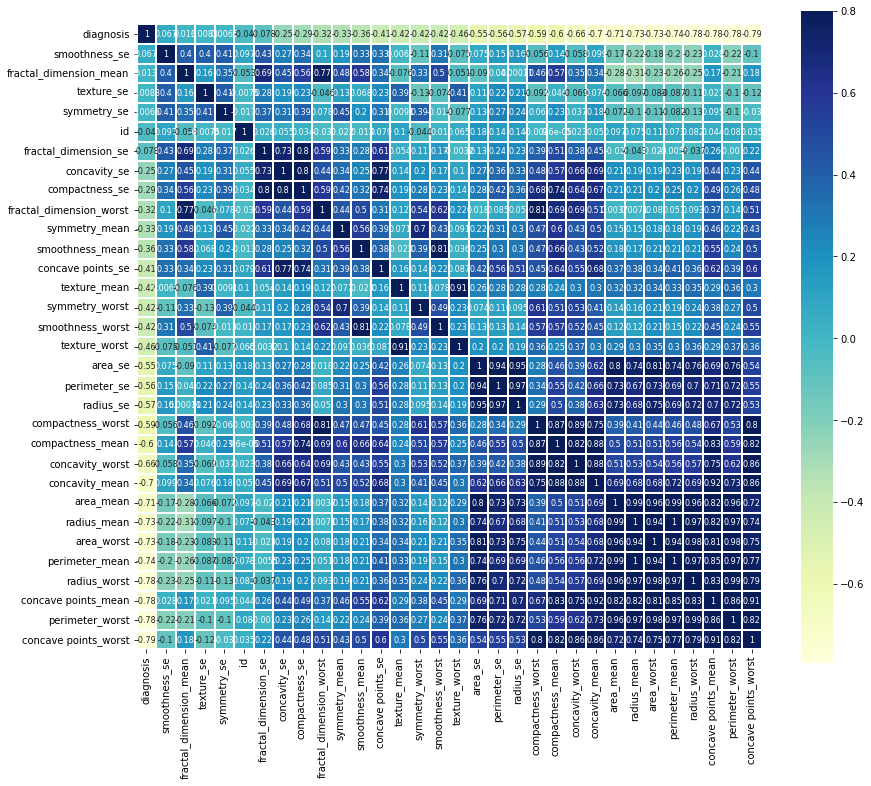

In [30]:
# Zoomed Heat Map
k= 32
cols = correlation.nlargest(k,'diagnosis')['diagnosis'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)

Index(['diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se',
       'symmetry_se', 'id', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave points_se', 'texture_mean',
       'symmetry_worst'],
      dtype='object')


<AxesSubplot:>

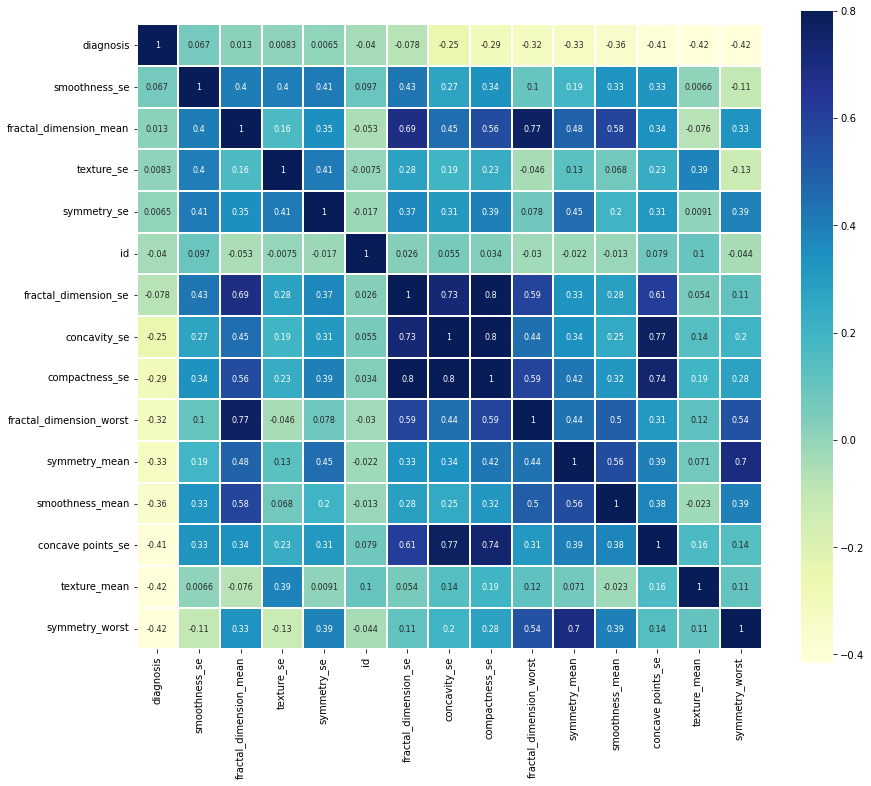

In [31]:
# Zoomed Heat Map
k= 15
cols = correlation.nlargest(k,'diagnosis')['diagnosis'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':8},yticklabels = cols.values)

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


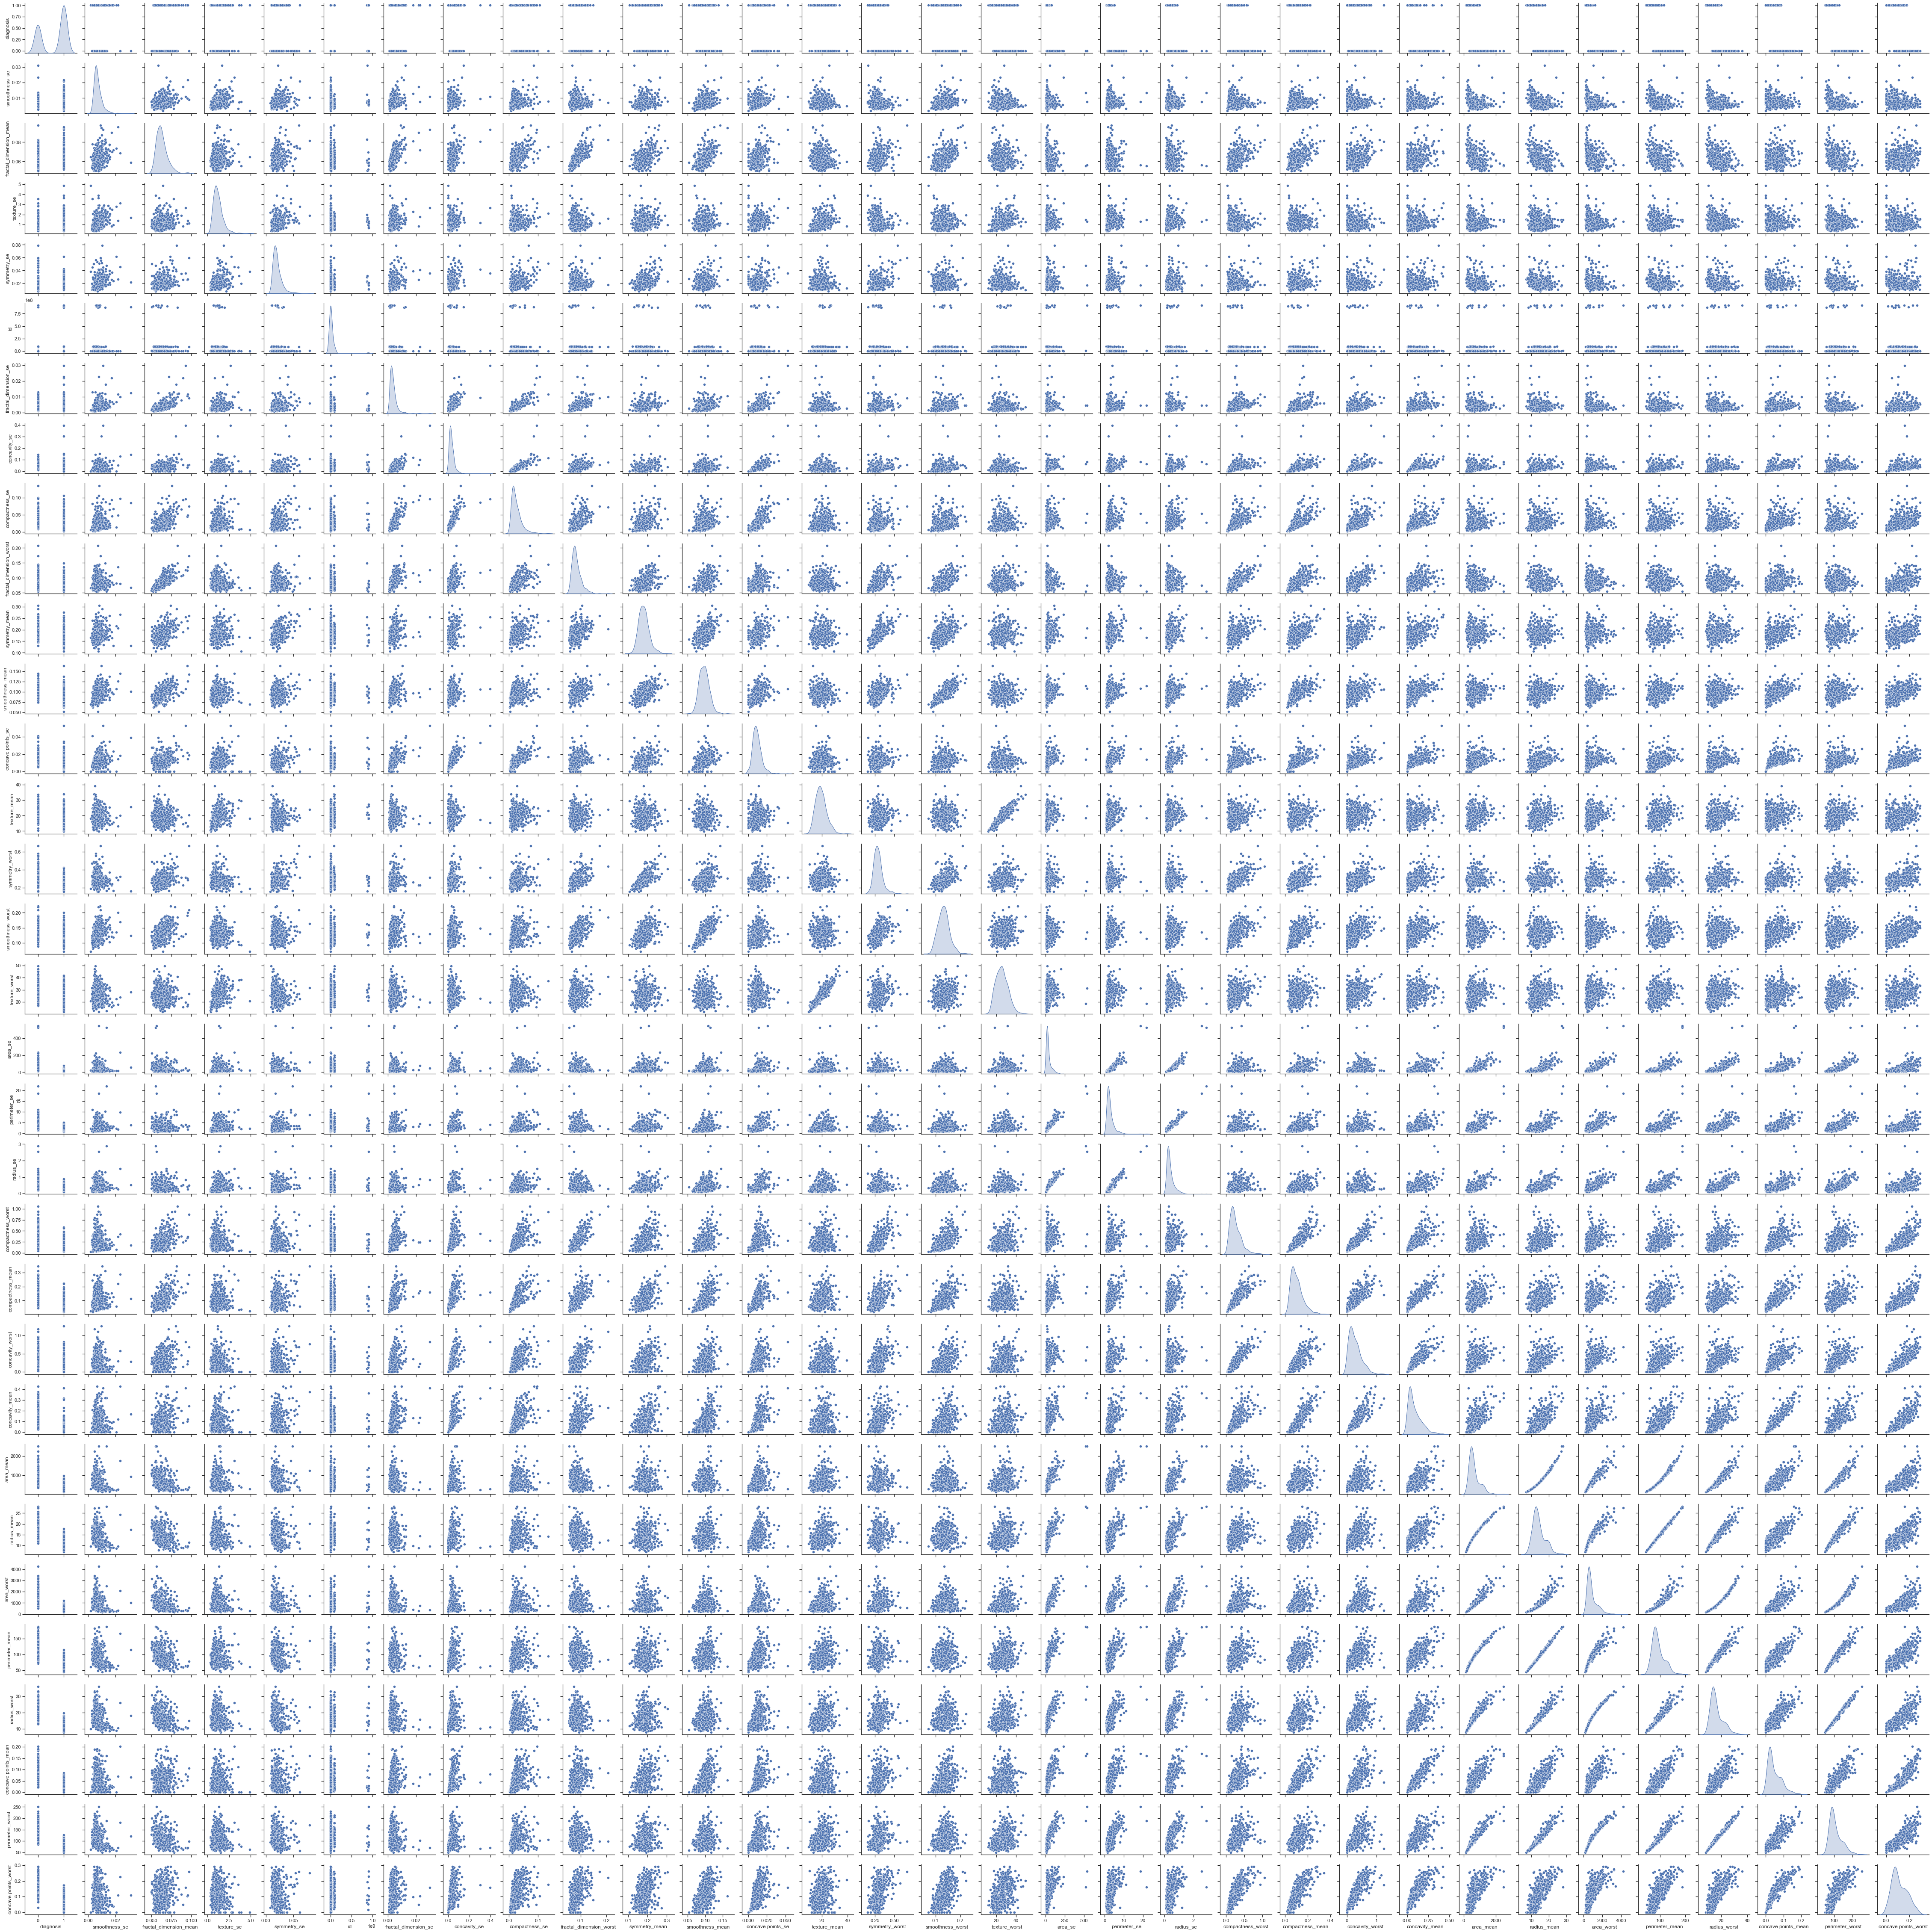

In [32]:
# Pairplot of numeric variables
# Pairplot of numeric variable
sns.set(style="ticks", color_codes=True)
columns= ['diagnosis', 'smoothness_se', 'fractal_dimension_mean', 'texture_se',
       'symmetry_se', 'id', 'fractal_dimension_se', 'concavity_se',
       'compactness_se', 'fractal_dimension_worst', 'symmetry_mean',
       'smoothness_mean', 'concave points_se', 'texture_mean',
       'symmetry_worst', 'smoothness_worst', 'texture_worst', 'area_se',
       'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean',
       'concavity_worst', 'concavity_mean', 'area_mean', 'radius_mean',
       'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean',
       'perimeter_worst', 'concave points_worst']
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")
plt.show()

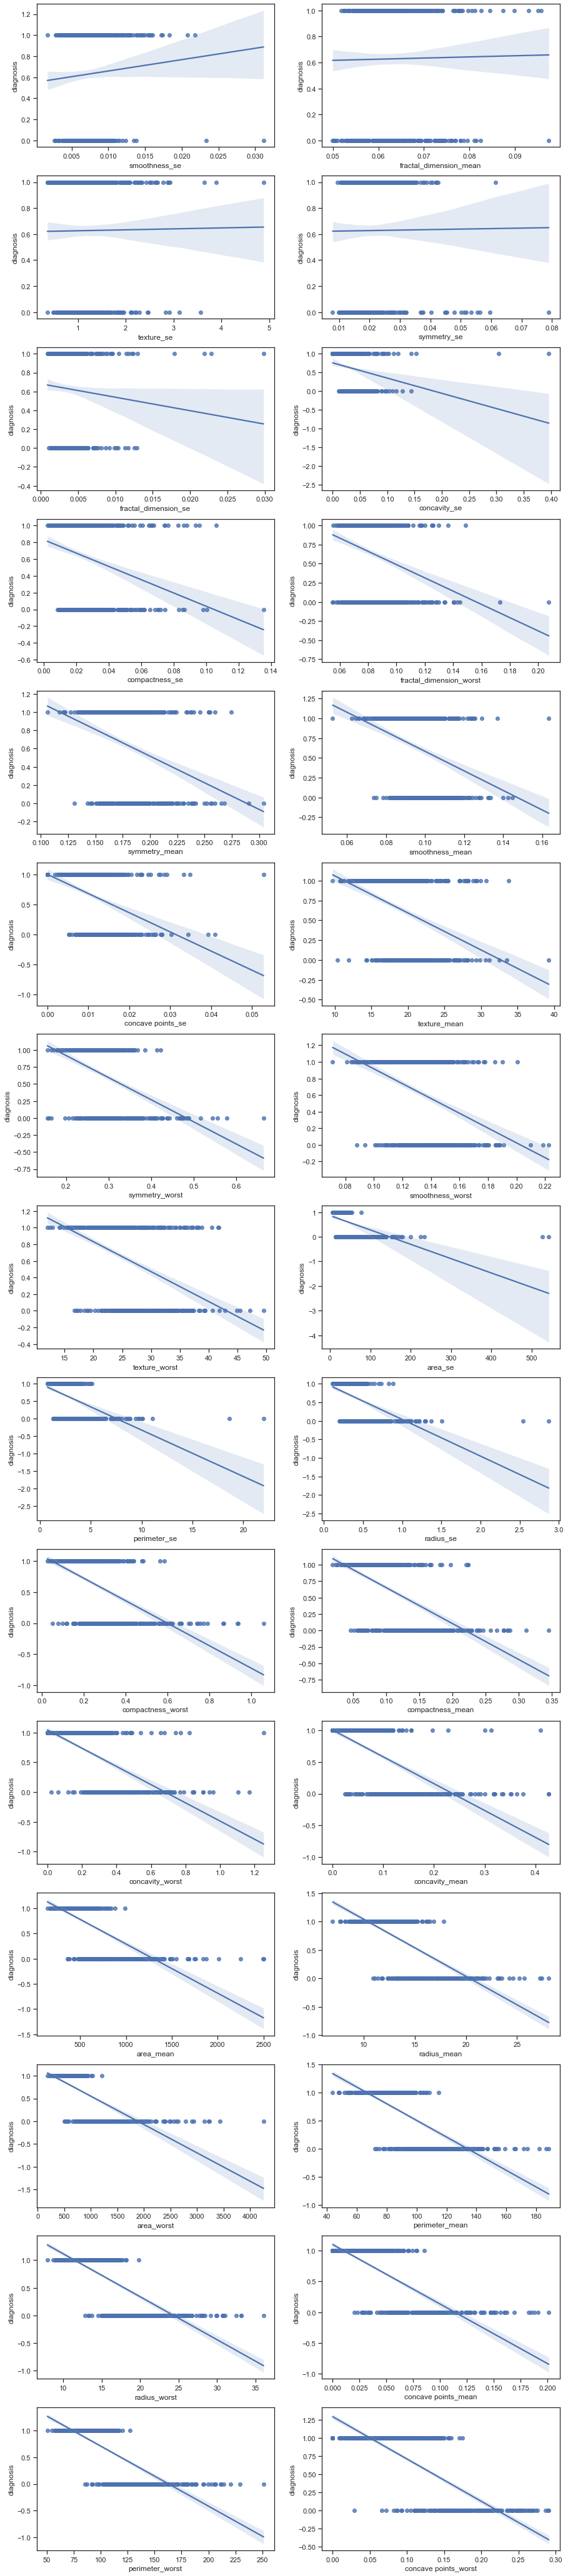

In [33]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20),(ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=15, ncols=2, figsize=(15,75))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

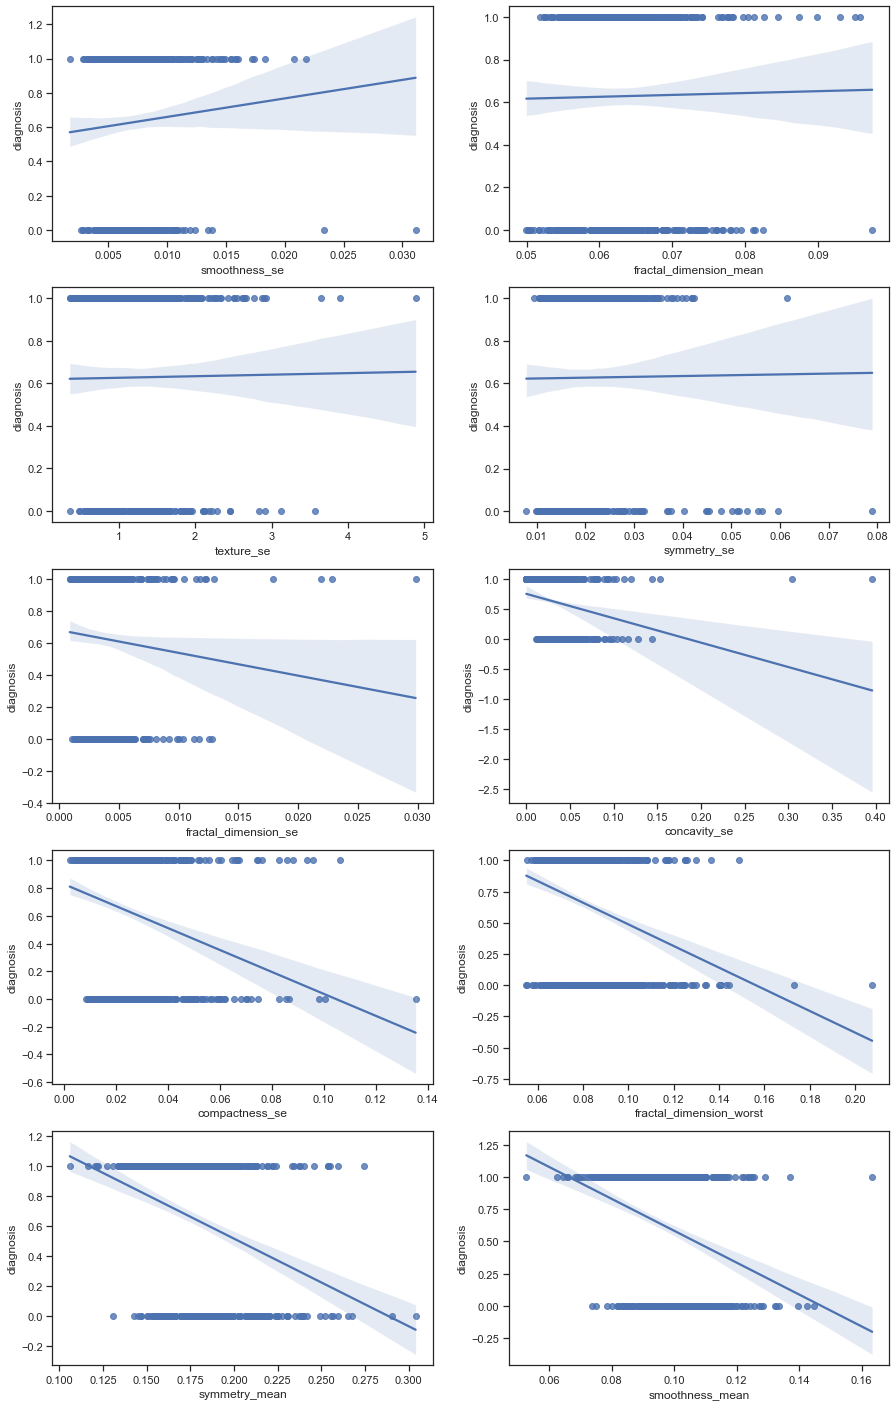

In [34]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['smoothness_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax1)

sns.regplot(x=df['fractal_dimension_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax2)

sns.regplot(x=df['texture_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax3)

sns.regplot(x=df['symmetry_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax4)

sns.regplot(x=df['fractal_dimension_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax5)

sns.regplot(x=df['concavity_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax6)

sns.regplot(x=df['compactness_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax7)

sns.regplot(x=df['fractal_dimension_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax8)

sns.regplot(x=df['symmetry_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax9)

sns.regplot(x=df['smoothness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax10)

plt.show()

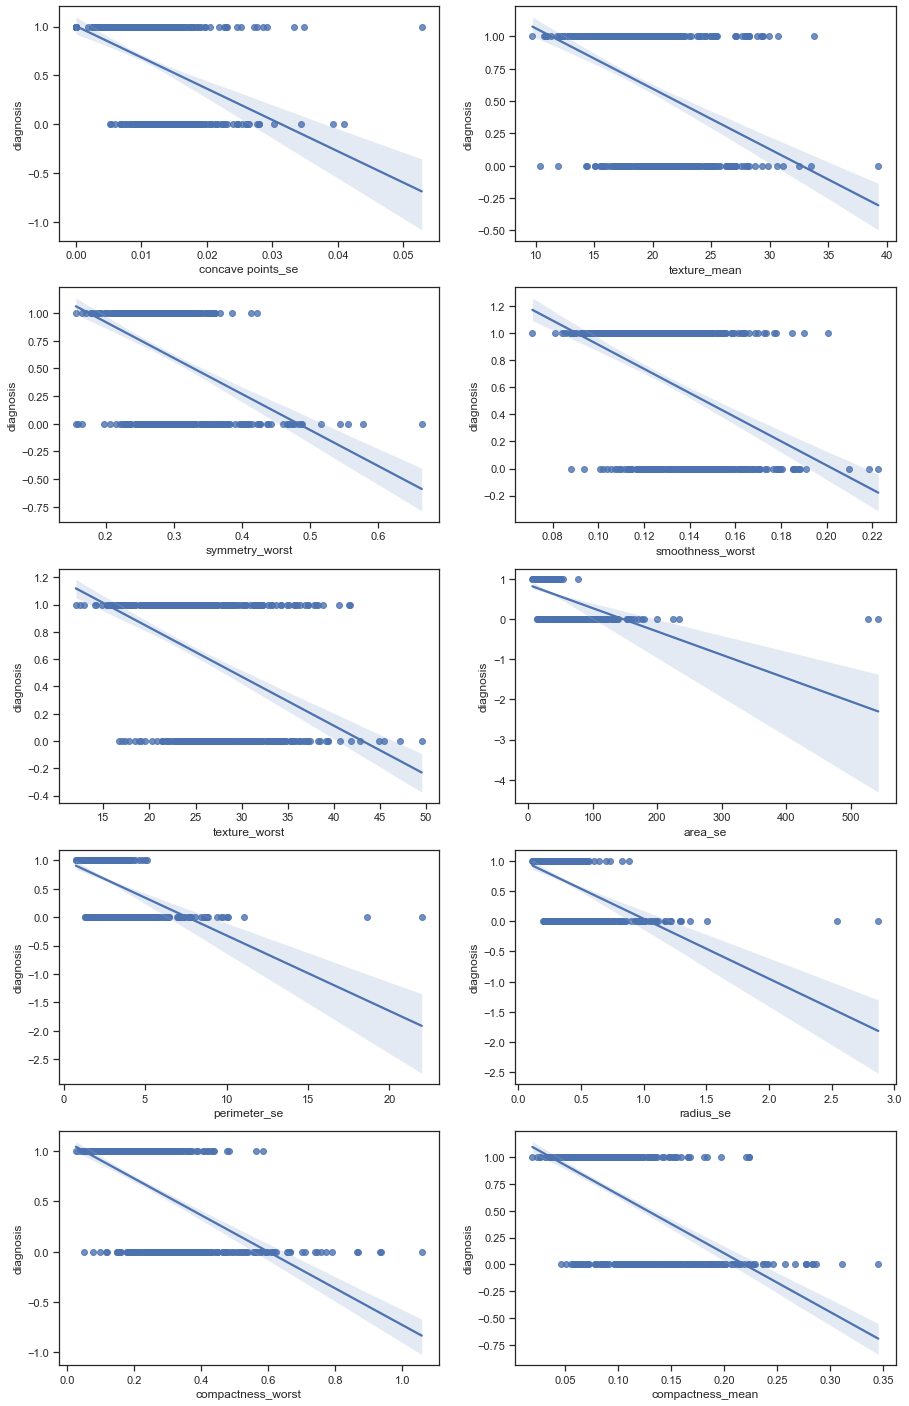

In [35]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax11,ax12),(ax13,ax14),(ax15,ax16),(ax17,ax18),(ax19,ax20))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concave points_se'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax11)

sns.regplot(x=df['texture_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax12)

sns.regplot(x=df['symmetry_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax13)

sns.regplot(x=df['smoothness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax14)

sns.regplot(x=df['texture_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax15)

sns.regplot(x=df['area_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax16)

sns.regplot(x=df['perimeter_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax17)

sns.regplot(x=df['radius_se'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax18)

sns.regplot(x=df['compactness_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax19)

sns.regplot(x=df['compactness_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax20)

plt.show()

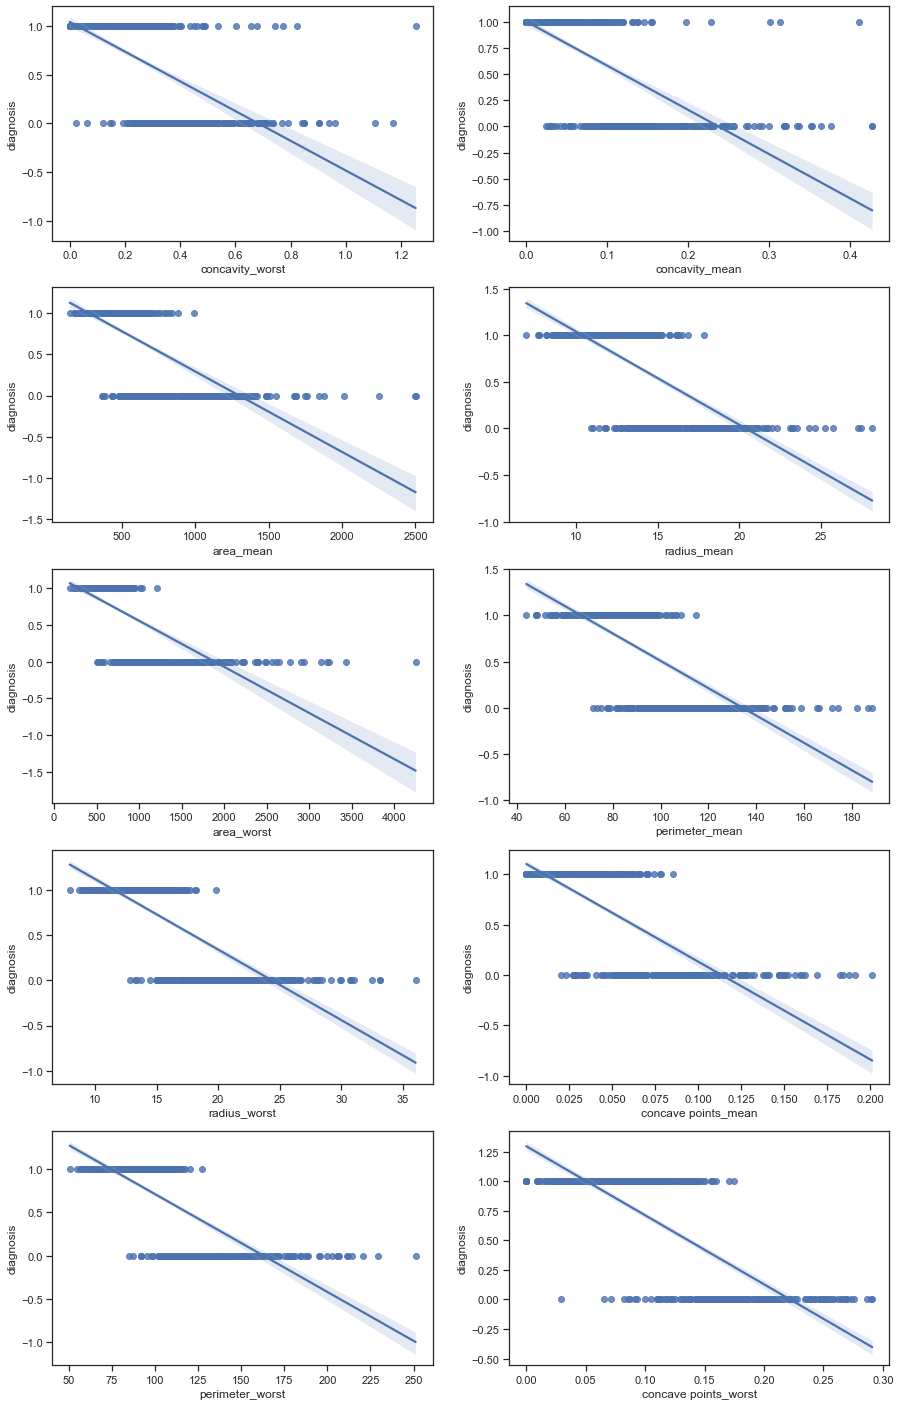

In [36]:
# Get the correlation plot of numeric variable with the target variable
fig, ((ax21,ax22),(ax23,ax24),(ax25,ax26),(ax27,ax28),(ax29,ax30))= plt.subplots(nrows=5, ncols=2, figsize=(15,25))

sns.regplot(x=df['concavity_worst'], y=df["diagnosis"], scatter= True, fit_reg= True, ax=ax21)

sns.regplot(x=df['concavity_mean'], y=df["diagnosis"], scatter=True, fit_reg= True, ax=ax22)

sns.regplot(x=df['area_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax23)

sns.regplot(x=df['radius_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax24)

sns.regplot(x=df['area_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax25)

sns.regplot(x=df['perimeter_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax26)

sns.regplot(x=df['radius_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax27)

sns.regplot(x=df['concave points_mean'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax28)

sns.regplot(x=df['perimeter_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax29)

sns.regplot(x=df['concave points_worst'], y=df["diagnosis"], scatter=True, fit_reg=True, ax=ax30)

plt.show()

## #1 With Standard Scaling

### 4.,5. X & Y

In [37]:
x=df.drop(labels='diagnosis',axis=1)
y=df[['diagnosis']]

In [38]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.23640517,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.23640344,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.43174109,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [-0.23572747,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [-0.23572517,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.24240586, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## #1.1 SVM

### 6. SVM Model Build

In [40]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [41]:
SVM.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(gamma='auto', kernel='linear')

### 8. Accuracy

In [42]:
SVM.score(x_train,y_train)

0.989010989010989

In [43]:
SVM.score(x_test,y_test)

0.9649122807017544

In [47]:
y_pred_train = SVM.predict(x_train)

In [48]:
y_pred_test = SVM.predict(x_test)

In [49]:
accuracy_score(y_train,y_pred_train)

0.989010989010989

In [50]:
accuracy_score(y_test,y_pred_test)

0.9649122807017544

## #1.2 Linear Regression

### 6. Linear Regression Model Build

In [51]:
LiReg=LinearRegression()

### 7. Fit

In [52]:
LiReg.fit(x_train, y_train)

LinearRegression()

### 8. Accuracy

In [53]:
LiReg.score(x_train,y_train)

0.7781253473090808

In [54]:
LiReg.score(x_test,y_test)

0.7246404176207943

## #1.3 Logistic Regression

### 6. Logistic Regression Model Build

In [55]:
LoReg=LogisticRegression()

### 7. Fit

In [56]:
LoReg.fit(x_train, y_train)

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### 8. Accuracy

In [57]:
LoReg.score(x_train,y_train)

0.989010989010989

In [58]:
LoReg.score(x_test,y_test)

0.9649122807017544

### With Min Max Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [ ]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [ ]:
SVM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
SVM.score(x_train,y_train)

In [ ]:
SVM.score(x_test,y_test)

### With Robust Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
scaler=RobustScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=0)

### 6. SVM Model Build

In [ ]:
SVM = svm.SVC(kernel='linear',gamma='auto')

### 7. Fit

In [ ]:
SVM.fit(x_train, y_train)

### 8. Accuracy

In [ ]:
SVM.score(x_train,y_train)

In [ ]:
SVM.score(x_test,y_test)

### Cross Validation

### Without Scaling

### 4.,5. X & Y

In [ ]:
x=df.drop(labels='y',axis=1)
y=df[['y']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=0)

### 6. C[Finding the value of C]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
C_Values=list(range(1,50,2))
cv_scores=[]
for k in C_Values:
    SVM = svm.SVC(kernel='linear',gamma='auto',C=k)
    scores=cross_val_score(SVM,x,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [ ]:
MSE=[1-x for x in cv_scores]
MSE

In [ ]:
optimal_k=C_Values[MSE.index(min(MSE))]
optimal_k

In [ ]:
plt.plot(C_Values,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')